**Load the data and create GloVe**

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import punkt
import nltk as nltk
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

df = pd.read_csv('/content/drive/MyDrive/webis.csv')
df['Stance'] = df['Stance'].astype('int')
df['Is Argument?'] = df['Is Argument?'].astype('int')
topics = pd.read_csv('/content/drive/MyDrive/webis_topics.csv')
df_all = pd.merge(df, topics, how='left', on='Topic ID')

target = df_all['Rhetorical Quality'].copy().to_list()
features = df_all['Premise'].copy().to_list()

########################## create vectors using glove ##############################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

asdf = 0

embeddings_index = {}
f = open('/content/drive/MyDrive/glove.6B.50d.txt', encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    try:
       coefs = np.asarray(values[1:], dtype='float32')
       embeddings_index[word] = coefs
       if asdf == 0:
         print(values[1:])
         print(np.asarray(values[1:]))
         print(word)
         asdf = 1
    except ValueError:
       pass
f.close()
print('Found %s word vectors.' % len(embeddings_index))
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(50)
    return v / np.sqrt((v ** 2).sum())

# create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in tqdm(X_train)]
xtest_glove = [sent2vec(x) for x in tqdm(X_test)]

print('Checkpoint2 -Normalized Vector for Sentences are created')

xtrain_glove = np.array(xtrain_glove)
xtest_glove = np.array(xtest_glove)

#pass glove-data to SVR
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# print(xtrain_glove.shape)
svr.fit(xtrain_glove, y_train)
y_pred = svr.predict(xtest_glove)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)


0it [00:00, ?it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581']
['0.418' '0.24968' '-0.41242' '0.1217' '0.34527' '-0.044457' '-0.49688'
 '-0.17862' '-0.00066023' '-0.6566' '0.27843' '-0.14767' '-0.55677'
 '0.14658' '-0.0095095' '0.011658'


7216it [00:00, 72157.66it/s]
14399it [00:00, 72054.52it/s]
20740it [00:00, 69220.45it/s]
27967it [00:00, 70075.63it/s]
35027it [00:00, 70232.04it/s]
42284it [00:00, 70915.50it/s]
49149it [00:00, 70219.91it/s]
56361it [00:00, 70777.47it/s]
63069it [00:00, 69623.41it/s]
69750it [00:01, 68396.38it/s]
76495it [00:01, 68108.28it/s]
83523it [00:01, 68744.78it/s]
90305it [00:01, 66806.73it/s]
97160it [00:01, 67318.41it/s]
104355it [00:01, 68642.24it/s]
111532it [00:01, 69550.81it/s]
118770it [00:01, 70375.74it/s]
125840it [00:01, 70470.87it/s]
133098it [00:01, 71089.85it/s]
140206it [00:02, 70645.80it/s]
147517it [00:02, 71366.51it/s]
154656it [00:02, 70422.11it/s]
161703it [00:02, 69873.51it/s]
168848it [00:02, 70312.14it/s]
175883it [00:02, 69013.39it/s]
183215it [00:02, 70250.69it/s]
190251it [00:02, 69211.15it/s]
197371it [00:02, 69795.47it/s]
204392it [00:02, 69916.25it/s]
211561it [00:03, 70438.46it/s]
218651it [00:03, 70575.36it/s]
226131it [00:03, 71790.86it/s]
233318it [00:03, 70388

Found 400000 word vectors.



100%|██████████| 1288/1288 [00:01<00:00, 779.08it/s]

100%|██████████| 322/322 [00:00<00:00, 833.50it/s]


Checkpoint2 -Normalized Vector for Sentences are created


RMSE of using GloVe and SVR

In [ ]:
print(rmse)

1.4040997353735423


In [ ]:
import xgboost
from sklearn.metrics import mean_squared_error
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(xtrain_glove, y_train)
y_pred = xgb.predict(xtest_glove)
xgb_mse = mean_squared_error(y_pred, y_test)
xgb_rmse = np.sqrt(xgb_mse)
# print(y_pred)
print('Xgboost RMSE: %.4f' % xgb_rmse)

[00:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost RMSE: 1.4838


**Creating POS 2n-grams**

Step 1: find all pairs of POS'es and set their occurencies to 0.

In [ ]:
import pandas as pd
import numpy as np
from nltk import word_tokenize
from nltk import pos_tag
import nltk as nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

n=2
taglist = set()
output = {}
for premise in df_all['Premise'].to_list():
  taglist = set()
  premise_tags = nltk.pos_tag(premise)
  for item in premise_tags: 
      taglist.add(item[1])
  taglist = list(taglist)      
  for i in range(len(taglist)-n+1):
      g = ' '.join(taglist[i:i+n])
      output.setdefault(g,0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
output

NameError: ignored

Step 2: for each premise fill the dictionary of POS'es pairs with occurencies.

In [ ]:
outputs = []
output1 = output.copy()
taglist1 = set()
for premise in df_all['Premise'].to_list():
  output1 = output.copy()
  taglist1 = set()
  premise_tags = nltk.pos_tag(premise)
  for item in premise_tags: 
      taglist1.add(item[1])
  taglist1 = list(taglist1)      
  for i in range(len(taglist1)-n+1):
      g = ' '.join(taglist1[i:i+n])
      # output.setdefault(g,0)
      output1[g] += 1
  outputs.append(output1)

Step 3: get values of dictionaries to represent vector-data and then pass to SVR

In [ ]:
data = []
for map in outputs:
  data.append(list(map.values()))

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, _, _ = train_test_split(data, df_all['Rhetorical Quality'].to_list(), test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
svr_nltk = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.001,gamma = 1e-8))
svr_nltk.fit(X_train1, y_train)
predictions = svr_nltk.predict(X_test1)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print(svr_nltk.score(X_test1,y_test))
print(rmse)

-0.18533463529026517
2.0829596650681643


Now lets take combine both GloVe and POS vectors into one vector and pass it to SVR

In [ ]:
X_train2 = []
for i, arr in enumerate(xtrain_glove):
  X_train2.append(np.concatenate((xtrain_glove[i], X_train1[i]),axis=None))
X_test2 = []
for i, arr in enumerate(xtest_glove):
  X_test2.append(np.concatenate((xtest_glove[i], X_test1[i]),axis=None))

In [ ]:
svr_all = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.001,gamma = 1e-8))
svr_all.fit(X_train2, y_train)
y_pred_all = svr_all.predict(X_test2)
mse = mean_squared_error(y_test,y_pred_all)
rmse = np.sqrt(mse)
print(svr_all.score(X_test2,y_test))
print(rmse)

-0.18532105736580862
2.08294773495614


Didnt work that well, improvement 0.00001 😅

With XGboost we get much better result, compared to SVR

In [ ]:
import xgboost
from sklearn.metrics import mean_squared_error
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(X_train2, y_train)
y_pred = xgb.predict(X_test2)
xgb_mse = mean_squared_error(y_pred, y_test)
xgb_rmse = np.sqrt(xgb_mse)
# print(y_pred)
print('Xgboost RMSE: %.4f' % xgb_rmse)

[13:08:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost RMSE: 1.3163


Some histogramms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b0ea1b38>]],
      dtype=object)

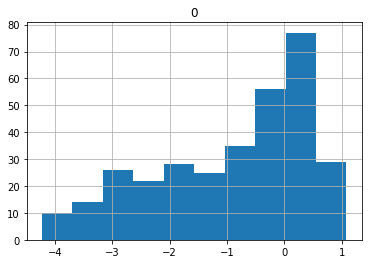

In [ ]:
pd.DataFrame(y_pred).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b0d90ef0>]],
      dtype=object)

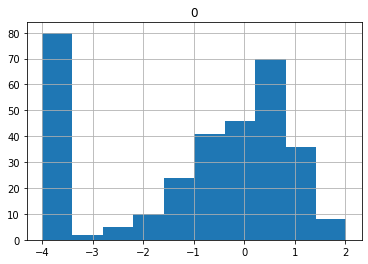

In [ ]:
pd.DataFrame(y_test).hist()